In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import permutation_test_score

In [2]:
data = load_iris()
X    = data['data']
y    = data['target']

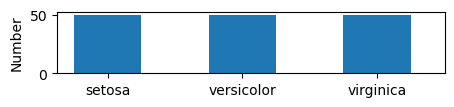

In [3]:
fig, ax = plt.subplots(figsize=(5,0.8))
ax.hist(y, bins= np.arange(0, 3, 0.5), align='left');
ax.set_ylabel('Number');
ax.set_xticks(np.arange(0, 3, 0.5));
ax.set_xticks(np.arange(3), ['setosa', 'versicolor', 'virginica']);

The dataset is perfectly balanced, therefore we will not choose as baseline a dummy estimator
which predicts systematically the most frequent class, but rather an estimator which generates
random samples from the three classes (uniform distribution).

The permutation_test_score make serveral permutations of the targets (breaking the dependency between the variables and the targets), and for each permutation, computes the score. The p-value represents then the proportion of times that the estimator performs better on a shuffled version of the data than in the data (in which there is a real mapping between X and y).

In [4]:
estimator_dummy = DummyClassifier(strategy="uniform")

In [5]:
score_D, permutation_scores_D, pvalue_D =  permutation_test_score(estimator_dummy, X, \
                                                                  y, random_state=0, n_permutations=100)

In [6]:
estimator_HGB = HistGradientBoostingClassifier(categorical_features=[0,1,2])

In [7]:
score_HGB, permutation_scores_HGB, pvalue_HGB = permutation_test_score(estimator_HGB, X, \
                                                                       y, random_state=0, n_permutations=100)

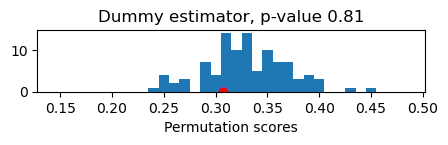

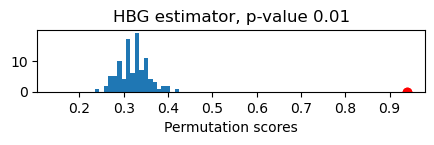

In [8]:
fig, ax = plt.subplots(figsize=(5,0.8))
ax.hist(permutation_scores_D, bins= np.arange(0.15, 0.5, 0.01), align='left', label = 'distribution of scores', density= True);
ax.plot([score_D, score_D],[0,0], 'or', label = 'score')
ax.set_xlabel('Permutation scores');
ax.set_title(f"Dummy estimator, p-value {np.round(pvalue_D, decimals= 2)}");


fig, ax = plt.subplots(figsize=(5,0.8))
ax.hist(permutation_scores_HGB, bins= np.arange(0.15, 0.5, 0.01), align='left', label = 'distribution of scores', density= True);
ax.plot([score_HGB, score_HGB],[0,0], 'or', label = 'score')
ax.set_xlabel('Permutation scores');
ax.set_title(f"HBG estimator, p-value {np.round(pvalue_HGB, decimals= 2)}");

What can you conclude about:

    • the existence of a significant statistical association between the iris type and the input features (petal and sepal width and length)?
    • the ability of each kind of estimator to assess or not such a statistical association between features and target variable?

The permutation test assesses whether there is enough empirical evidence (p-value) against the null 
hypothesis that features and targets are independent. 

This null hypothesis can not be proven, it can only be rejected, if one finds one estimator whose p-value is 
statistically significant. In here as we take 100 permutations, and the lowest p-value is around 1/100, we can 
therefore take a significance level of alpha = 0.05.
                    
The dummy estimator can't reject the null hypothesis 0.96 >> 0.05, whereas the HBG estimator can do it: 0.01 < 0.05
Looking at the score of the HGB - 0.94 - and comparing it with the distribution of the shuffled variables, comprised between 0.25 and 0.4, we can conclude on the ability of the HGB estimator to capture the statistical association between the features (length and width of the sepals and petals)  and the three species of Iris.                   